# Setup

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

from PIL import Image, ImageDraw, ImageFont
import cv2 as cv
from glob import glob
import time
import random
import math
import pathlib
current_path = pathlib.Path().resolve()

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Create Dataset

## Dowloading resources

downloading fonts and base credit cards and base ID cards images
and saving them inside their folders

In [ ]:
print("current_path:", current_path)

font_arial_url = 'https://github.com/sinaziaee/optical_digit_recognizer/raw/main/fonts/arial.ttf'
font_ocr_url = 'https://github.com/sinaziaee/optical_digit_recognizer/raw/main/fonts/ocr_a.ttf'
font_yekan_url = 'https://github.com/sinaziaee/optical_digit_recognizer/raw/main/fonts/yekan.ttf'
font_nazanin_url = 'https://github.com/sinaziaee/optical_digit_recognizer/raw/main/fonts/nazanin.ttf'
bank_base_url = 'https://github.com/sinaziaee/optical_digit_recognizer/raw/main/bank_background_images'
id_base_url = 'https://github.com/sinaziaee/optical_digit_recognizer/raw/main/id_background_images/'

!wget -P /content/fonts $font_arial_url -N -q
!wget -P /content/fonts $font_ocr_url -N -q
!wget -P /content/fonts $font_yekan_url -N -q
!wget -P /content/fonts $font_nazanin_url -N -q

for i in range(1, 34):
  img_path = f'{bank_base_url}/{i}.jpg'
  !wget -P /content/bank $img_path -N -q

for i in range(1, 3):
  img_path = f'{id_base_url}/id{i}.jpg'
  !wget -P /content/id $img_path -N -q

current_path: /content


In [ ]:
# path variables to use in code
bank_bg_path = 'bank_bg_images'
bank_bg_base_path = f'{current_path}/{bank_bg_path}'
font_base_path = f'{current_path}/fonts/'

files = []
# looking for bank background images in their folders and adding their addres to a list
for f in glob(f'{current_path}/bank/*.jpg'):
  files.append(f)

## Creating backgroud images for credit cards

In [ ]:
# path variables to use in code
id_bg_base_path = f'{current_path}/id_bg_images'
id_base_path = f'{current_path}/id_images'
bank_base_path = f'{current_path}/bank_images/' 
drive_path = 'project_ocr'


# creating folders if they don't exist
if not os.path.isdir(f'/content/drive/MyDrive/{drive_path}/'):
  os.mkdir(f'/content/drive/MyDrive/{drive_path}/')

if not os.path.isdir(f'/content/drive/MyDrive/{drive_path}/bank/'):
  os.mkdir(f'/content/drive/MyDrive/{drive_path}/bank/')

if not os.path.isdir(f'/content/drive/MyDrive/{drive_path}/id/'):
  os.mkdir(f'/content/drive/MyDrive/{drive_path}/id/')

if not os.path.isdir(f'{bank_bg_base_path}/'):
  os.mkdir(f'{bank_bg_base_path}/')

if not os.path.isdir(id_bg_base_path):
  os.mkdir(id_bg_base_path)

if not os.path.isdir(id_base_path):
  os.mkdir(id_base_path)

if not os.path.isdir(bank_base_path):
  os.mkdir(bank_base_path)

# cropping images with the help of opencv and cutting
for i, file in enumerate(files):
  img = cv.imread(files[i])
  h, w, c = img.shape
  new = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  if w > 200:
    h_sec = int(h/7)
    w_sec = int(w/6)
    new = img[3*h_sec:6*h_sec, w_sec:5*w_sec,]
  else:
    h_sec = int(h/14)
    w_sec = int(w/12)
    new = img[3*h_sec:12*h_sec, w_sec:12*w_sec,]
  try:
    cv.imwrite(f'{bank_bg_base_path}/{i}.jpg', new)
  except Exception as e:
    pass
print(len(files))

33


In [ ]:
random_bank_num = 10
random_id_num = 100

## Creating the Credit images

In [ ]:
from PIL import ImageFilter

# english fonts for credit card 
fonts = [f'{font_base_path}/arial.ttf', f'{font_base_path}/ocr_a.ttf']
# creating random 16 digit numbers with spaces between them
def create_random_credit_number():
  num = random.randint(pow(10,15), (pow(10, 16)-1))
  num = str(num)
  new_num = ''
  for i in range(16):
    if i % 4 == 0:
      new_num += ' '
    new_num += num[i]
  return num, new_num


files = []
# iterating on cropped background images
for f in glob(f'{bank_bg_base_path}/*.jpg'):
  files.append(f)

m = 0
bank_labels = []
# for loop on background images
for i in range(len(files)):
  arr = cv.imread(files[i])
  h, w, c = arr.shape
  # for loop on fonts
  for j in range(len(fonts)):
    if w > 200:
      center = int(h/2) - 13
      fnt = ImageFont.truetype(fonts[j], 26)
    else:
      center = int(h/2) - 6
      fnt = ImageFont.truetype(fonts[j], 12)
    # for loop on 10 random numbers
    for k in range(random_bank_num):
      img = Image.open(files[i])
      num, str_num = create_random_credit_number()
      d = ImageDraw.Draw(img)
      # writing with black color on cards
      d.text((10, center), str_num, font=fnt, fill=(0, 0, 0))
      out_img_path = f'{bank_base_path}{m}.jpg'
      img.save(out_img_path)
      img.save(f'/content/drive/MyDrive/{drive_path}/bank/{m}.jpg')
      d2 = ImageDraw.Draw(img)
      bank_labels.append([m, num])
      m += 1
      # writing with white color on cards
      d2.text((10, center), str_num, font=fnt, fill=(255, 255, 255))
      out_img_path = f'{bank_base_path}{m}.jpg'
      bank_labels.append([m, num])
      img.save(out_img_path)
      img.save(f'/content/drive/MyDrive/{drive_path}/bank/{m}.jpg')
      m += 1

In [ ]:
print(len(bank_labels))
print(m)

1320
1320


In [ ]:
m = 0

size = len(bank_labels)
for i in range(size):
  r = random.randint(1, 100)
  if r < 40:
    rand = random.randint(-5, 5)
    original_Image = Image.open(f'/content/drive/MyDrive/{drive_path}/bank/{i}.jpg')
    rotated_image = original_Image.rotate(rand)
    rotated_image.save(f'/content/drive/MyDrive/{drive_path}/bank/{size+m}.jpg')
    num = bank_labels[i]
    bank_labels.append([size+m, num])
    m+=1
  if r > 20 and r < 60:
    original_Image = Image.open(f'/content/drive/MyDrive/{drive_path}/bank/{i}.jpg')
    blured_images = original_Image.filter(ImageFilter.BoxBlur(1))
    blured_images.save(f'/content/drive/MyDrive/{drive_path}/bank/{size+m}.jpg')
    num = bank_labels[i]
    bank_labels.append([size+m, num])
    m+=1

In [ ]:
print(len(bank_labels))

2316


## Real data

In [ ]:
my_cards = '/content/drive/MyDrive/project_ocr/my_cards/'
size=len(bank_labels)
m=0
for file in glob(f'{my_cards}*.jpg'):
  img = cv.imread(file)
  name = str(file).split('/')[-1]
  if '_' in name:
    inx = name.index('_')
    a = name[inx+1]
    name = name.replace(f'_{a}', '')
  original_Image = Image.open(f'/content/drive/MyDrive/{drive_path}/my_cards/{name}')
  original_Image.save(f'/content/drive/MyDrive/{drive_path}/bank/{size+m}.jpg')
  bank_labels.append([size+m, str(name).replace('.jpg', '')])
  m+=1

In [ ]:
print(len(bank_labels))

2333


In [ ]:
bank_labels = np.array(bank_labels)
df = pd.DataFrame(bank_labels, columns=['image_name', 'label'])
df.to_csv('bank_labels.csv')
df.to_csv('/content/drive/MyDrive/project_ocr/bank_labels.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


## Creating background images for ID card

(720, 1280, 3)
(557, 800, 3)


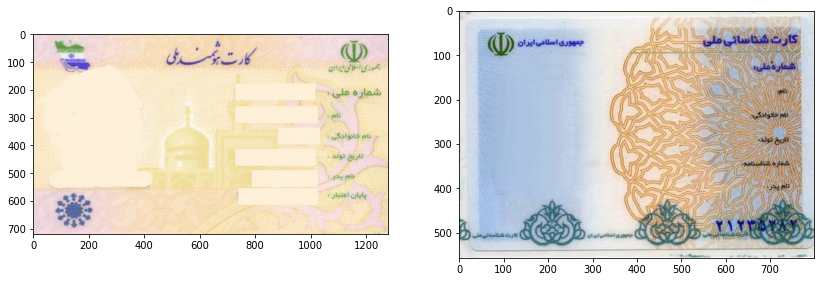

In [ ]:
# loading ID cards
id1 = cv.imread(f'{current_path}/id/id1.jpg')
id2 = cv.imread(f'{current_path}/id/id2.jpg')
print(id1.shape)
print(id2.shape)
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.imshow(id1)
plt.subplot(122)
plt.imshow(id2)
plt.show()

In [ ]:
# creating background cropped ID images 
arr1 = id1[160:250, 750:1050]
cv.imwrite(f'{id_bg_base_path}/id_bg1.jpg', arr1)
arr2 = id2[300:390, 270:620]
cv.imwrite(f'{id_bg_base_path}/id_bg2.jpg', arr2)
arr3 = id1[220:350, 350:700]
cv.imwrite(f'{id_bg_base_path}/id_bg3.jpg', arr3)
arr4 = id1[120:250, 350:700]
cv.imwrite(f'{id_bg_base_path}/id_bg4.jpg', arr4)
arr5 = id1[340:470, 400:700]
cv.imwrite(f'{id_bg_base_path}/id_bg5.jpg', arr5)

True

In [ ]:
# creating a 10 digit random number 
def create_random_id_number():
  num = random.randint(pow(10,9), (pow(10, 10)-1))
  new_num = str(num)
  return num, new_num
# changing english digit to persian digit
def to_persian(n):
  if n == 0:
    return '۰'
  elif n == 1:
    return '۱'
  elif n == 2:
    return '۲'
  elif n == 3:
    return '۳'
  elif n == 4:
    return '۴'
  elif n == 5:
    return '۵'
  elif n == 6:
    return '۶'
  elif n == 7:
    return '۷'
  elif n == 8:
    return '۸'
  elif n == 9:
    return '۹'
# converting number from english to persian
def num_to_persian(num):
  copy = num
  string = ''
  while copy !=0:
    r = copy % 10
    copy = int(copy / 10)
    string = to_persian(r) + string
  return string

## Creating ID images

In [ ]:
from PIL import ImageFilter

files = []
for file in glob(f'{id_bg_base_path}/id_bg*.jpg'):
  files.append(file)

fonts = ['fonts/yekan.ttf', 'fonts/nazanin.ttf']
id_labels = []
m = 0
# for loop on 1000 different random numbers
for i in range(random_id_num):
  num, str_num = create_random_id_number()
  str_num = num_to_persian(num)
  # for loop on background id images
  for j in range(len(files)):
    h, w, c = cv.imread(files[j]).shape
    center = int(h / 2) - 15
    # for loop on fonts
    for k in range(len(fonts)):
      img = Image.open(files[j])
      fnt = ImageFont.truetype(fonts[k], 30)
      d = ImageDraw.Draw(img)
      d.text((10, center), str_num, font=fnt, fill=(0, 0, 0))
      out_img_path = f'{id_base_path}/{m}.jpg'
      # saving images
      img.save(out_img_path)
      # saving to google drive
      img.save(f'/content/drive/MyDrive/{drive_path}/id/{m}.jpg')
      arr = cv.imread(out_img_path)
      arr = cv.cvtColor(arr, cv.COLOR_BGR2RGB)
      id_labels.append([m, num])
      m += 1


m = 0

size = len(id_labels)
for i in range(size):
  r = random.randint(1, 100)
  if r < 40:
    rand = random.randint(-5, 5)
    original_Image = Image.open(f'/content/drive/MyDrive/{drive_path}/id/{i}.jpg')
    rotated_image = original_Image.rotate(rand)
    rotated_image.save(f'/content/drive/MyDrive/{drive_path}/id/{size+m}.jpg')
    num = id_labels[i]
    id_labels.append([size+m, num])
    m+=1
  if r > 20 and r < 60:
    original_Image = Image.open(f'/content/drive/MyDrive/{drive_path}/id/{i}.jpg')
    blured_images = original_Image.filter(ImageFilter.BoxBlur(1))
    blured_images.save(f'/content/drive/MyDrive/{drive_path}/id/{size+m}.jpg')
    num = id_labels[i]
    id_labels.append([size+m, num])
    m+=1


id_labels = np.array(id_labels)
df = pd.DataFrame(id_labels, columns=['image_name', 'label'])
df.to_csv('id_labels.csv')
df.to_csv('/content/drive/MyDrive/project_ocr/id_labels.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Resources:

[write on images](https://www.geeksforgeeks.org/adding-text-on-image-using-python-pil/)

In [ ]:
print(len(bank_labels))
print(len(id_labels))

2333
1793


# Define and train model

##Hyper Parameters

In [3]:
def to_persian(n):
  if n == 0:
    return '۰'
  elif n == 1:
    return '۱'
  elif n == 2:
    return '۲'
  elif n == 3:
    return '۳'
  elif n == 4:
    return '۴'
  elif n == 5:
    return '۵'
  elif n == 6:
    return '۶'
  elif n == 7:
    return '۷'
  elif n == 8:
    return '۸'
  elif n == 9:
    return '۹'

In [4]:
# Path to the data directory
bank_dir = Path('drive/MyDrive/project_ocr/bank')
bank_df = pd.read_csv('drive/MyDrive/project_ocr/bank_labels.csv')
id_dir = Path('drive/MyDrive/project_ocr/id')
id_df = pd.read_csv('drive/MyDrive/project_ocr/id_labels.csv')

# To show that we want to use a model that we had before, or a new model
is_load_model = True
# Batch size for training and validation
batch_size = 16

# Desired image dimensions
img_width = 200
img_height = 50

# Factor by which the image is going to be downsampled
# by the convolutional blocks. We will be using two
# convolution blocks and each block will have
# a pooling layer which downsample the features by a factor of 2.
# Hence total downsampling factor would be 4.
downsample_factor = 4

# Whole characters of the problem
characters = [' ']
for i in range(10):
  characters.append(str(i))
  characters.append(to_persian(i))

## Preprocessing

In [5]:
# Get list of all the images
bank_images = list(path for path in os.listdir(bank_dir) if path.endswith('.jpg'))
# Create list of labels with respect to bank_labels.csv
bank_labels = []
for i,img in enumerate(bank_images):
  bank_labels.append(str(bank_df[bank_df.image_name==int(img.split('.jpg')[0])].iloc[0]['label']))
  bank_images[i] = os.path.join(bank_dir, img)
# Do the same for id cards
id_images = list(path for path in os.listdir(id_dir) if path.endswith('.jpg'))
id_labels = []
for i,img in enumerate(id_images):
  label = str(id_df[id_df.image_name==int(img.split('.jpg')[0])].iloc[0]['label'])
  temp = ''
  if '[' in label:
    inx1 = label.index(',')
    inx2 = label.index(']')
    label = label[inx1+2: inx2]
  for c in label:
    temp+=to_persian(int(c))
  id_labels.append(temp + 6*' ')
  id_images[i] = os.path.join(id_dir, img)

# Concat all of the dataset
images = bank_images + id_images
labels = bank_labels + id_labels
max_length = max([len(label) for label in labels])

print("Number of images found: ", len(images))
print("Number of labels found: ", len(labels))
print("Number of unique characters: ", len(characters))
print("Characters present: ", characters)
print("Maximum length:", max_length)

Number of images found:  2321
Number of labels found:  2321
Number of unique characters:  21
Characters present:  [' ', '0', '۰', '1', '۱', '2', '۲', '3', '۳', '4', '۴', '5', '۵', '6', '۶', '7', '۷', '8', '۸', '9', '۹']
Maximum length: 16


In [6]:
# Mapping characters to integers
char_to_num = layers.StringLookup(
    vocabulary=characters, mask_token=None
)

# Mapping integers back to original characters
num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)


def split_data(images, labels, train_size=0.9, shuffle=True):
    # 1. Get the total size of the dataset
    size = len(images)
    # 2. Make an indices array and shuffle it, if required
    indices = np.arange(size)
    if shuffle:
        np.random.shuffle(indices)
    # 3. Get the size of training samples
    train_samples = int(size * train_size)
    # 4. Split data into training and validation sets
    x_train, y_train = images[indices[:train_samples]], labels[indices[:train_samples]]
    x_valid, y_valid = images[indices[train_samples:]], labels[indices[train_samples:]]
    return x_train, x_valid, y_train, y_valid


# Splitting data into training and validation sets
x_train, x_valid, y_train, y_valid = split_data(np.array(images), np.array(labels))

def encode_single_sample(img_path, label):
    # 1. Read image
    img = tf.io.read_file(img_path)
    # 2. Decode and convert to grayscale
    img = tf.io.decode_png(img, channels=3)
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 4. Resize to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    # 5. Transpose the image because we want the time
    # dimension to correspond to the width of the image.
    img = tf.transpose(img, perm=[1, 0, 2])
    # 6. Map the characters in label to numbers
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    # 7. Return a dict as our model is expecting two inputs
    return {"image": img, "label": label}


## Create `Dataset` objects

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
validation_dataset = (
    validation_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

## Visualize the data

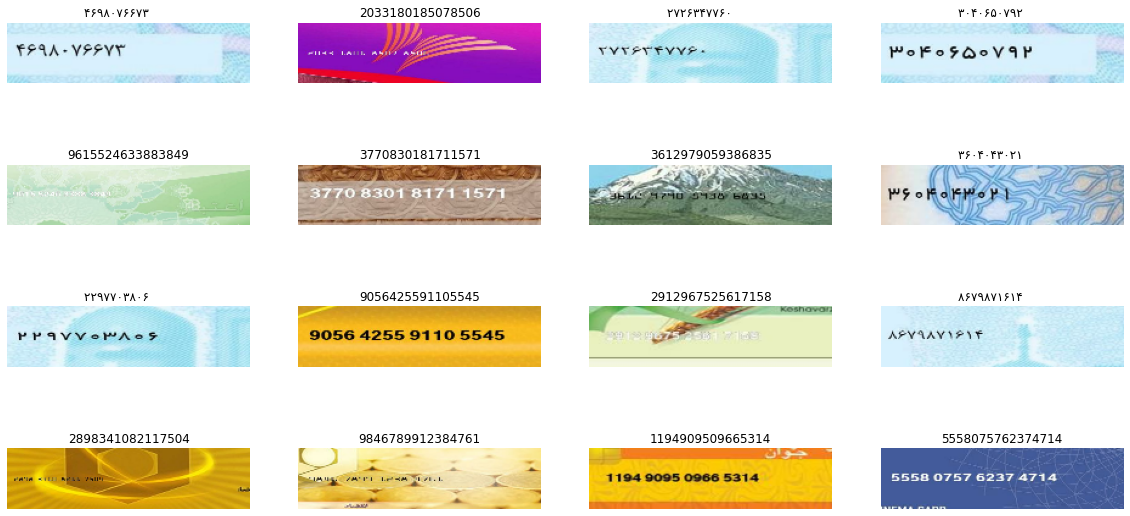

In [8]:
_, ax = plt.subplots(4, 4, figsize=(20, 10))
for batch in train_dataset.take(1):
    images = batch["image"]
    labels = batch["label"]
    for i in range(16):
        img = (images[i] * 255).numpy().astype("uint8")
        label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")
        ax[i // 4, i % 4].imshow(tf.transpose(img, perm=[1,0,2]))
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
plt.show()

## Model

In [9]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None, **kwargs):
        super().__init__(name=name)
        super(CTCLayer, self).__init__(**kwargs)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred


def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(img_width, img_height, 3), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    # First conv block
    x = layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(
        len(char_to_num.get_vocabulary()) + 1, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
    )
    # Optimizer
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model

In [10]:
# Get the model
if is_load_model:
    model = tf.keras.models.load_model(
        'our_model.h5', custom_objects={'CTCLayer': CTCLayer})
else:
    model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 200, 50, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 Conv1 (Conv2D)                 (None, 200, 50, 32)  896         ['image[0][0]']                  
                                                                                                  
 pool1 (MaxPooling2D)           (None, 100, 25, 32)  0           ['Conv1[0][0]']                  
                                                                                                  
 Conv2 (Conv2D)                 (None, 100, 25, 64)  18496       ['pool1[0][0]']       

## Training

In [11]:
epochs = 1
early_stopping_patience = 10
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping],
)

model.save('drive/MyDrive/project_ocr/our_model.h5')

131/131 [==============================] - 190s 1s/step - loss: 5.2494 - val_loss: 4.9654


# Test

In [ ]:
# Get the prediction model by extracting layers till the output layer
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)

# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text

some sample predictions:


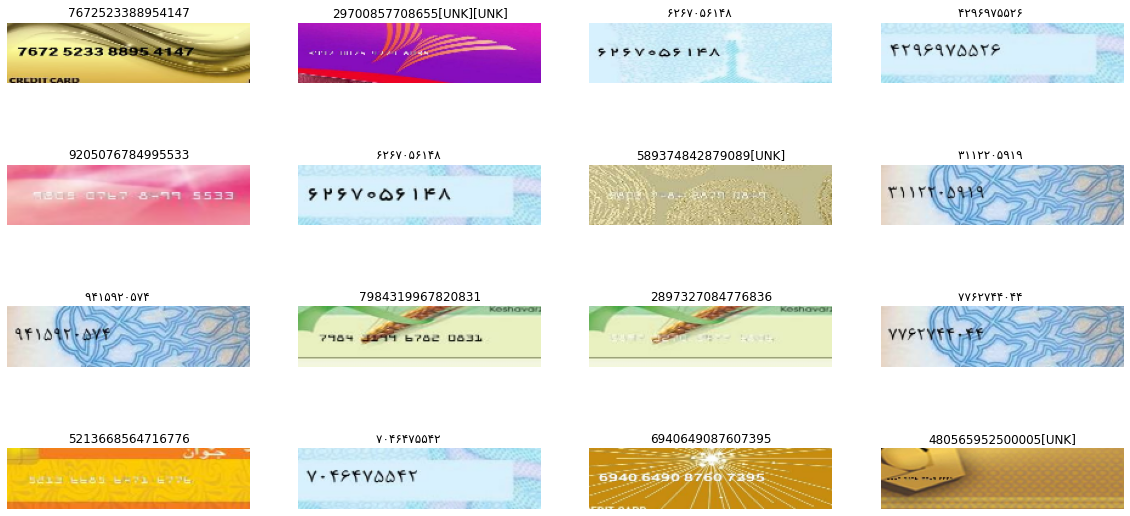

In [ ]:
#  Let's check results on some validation samples
print("some sample predictions:")
for batch in validation_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(20, 10))
    for i in range(len(pred_texts)):
        img = (batch_images[i] * 255).numpy().astype(np.uint8)
        title = f"{pred_texts[i]}"
        img = tf.transpose(img, perm=[1,0,2])
        ax[i // 4, i % 4].imshow(img)
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
plt.show()

In [ ]:
# Calculate accuracy on training set
# We count the true predicted digits for each of the data and then divide it by all of them
results=[]
for batch in train_dataset.take(1000):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)
    
    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)
    
    true_count = 0
    total_count = 0
    for i in range(len(orig_texts)):
      for j,char in enumerate(orig_texts[i]):
        # Check if the charracters are the same, we have to do this for every char of the hole batch
        if char == pred_texts[i][j]:
          true_count+=1
        total_count+=1
    results.append(true_count/total_count)

print("accuracy on train:", np.mean(results)*100,"%")

accuracy on train: 87.87869751908397 %


In [ ]:
# Calculate accuracy on validation set
# We count the true predicted digits for each of the data and then divide it by all of them
results=[]
for batch in validation_dataset.take(500):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)
    
    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)
    
    true_count = 0
    total_count = 0
    for i in range(len(orig_texts)):
      for j,char in enumerate(orig_texts[i]):
        # Check if the charracters are the same, we have to do this for every char of the whole batch
        if char == pred_texts[i][j]:
          true_count+=1
        total_count+=1
    results.append(true_count/total_count)

print("accuracy on validation:", np.mean(results)*100, "%")

accuracy on validation: 84.69907407407408 %


In [ ]:
def predict(img_path, max_length=16):
  # 1. Read image
  img = tf.io.read_file(img_path)
  # 2. Decode and convert to grayscale
  img = tf.io.decode_png(img, channels=3)
  # 3. Convert to float32 in [0, 1] range
  img = tf.image.convert_image_dtype(img, tf.float32)
  # 4. Resize to the desired size
  img = tf.image.resize(img, [img_height, img_width])
  # 5. Transpose the image because we want the time
  # dimension to correspond to the width of the image.
  img = tf.transpose(img, perm=[1, 0, 2])
  
  result = decode_batch_predictions(prediction_model.predict(np.array([img])))[0]
  result = result.replace('[UNK]', '')
  return result